# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/manjeetsingh/retaildataset?select=stores+data-set.csv

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
#import needed librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read dataset
features_df = pd.read_csv("Features data set.csv")
sales_df = pd.read_csv("sales data-set.csv")
stores_df = pd.read_csv("stores data-set.csv")

In [2]:
#View the features table 
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
#View the features table 
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
#View the features table 
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
# Features closer look into the collumns
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
# Features closer look into the collumns
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
# Features closer look into the collumns
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [8]:
#I can see that I can merge the 3 tables by Store and Date
merge_df = pd.merge(sales_df,features_df, on=['Store','Date', 'IsHoliday'], how='left')
merge_df = pd.merge(merge_df,stores_df, on=['Store'], how='left')

In [9]:
#See if dataframe was imported properly and get more information on the dataframe table

merge_df.info()
merge_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [10]:
#Show how many rows and columns in our dataframe
merge_df.shape

(421570, 16)

In [11]:
#Look at Summary Statistics
merge_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [12]:
#Checking for Nulls
#There is a decent number of nulls for each markdown price. However we are aware that markdown data is only avaiable after Nov 2011 and is not available for all stores all the time 
merge_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [13]:
#Take a closer look into the dates
merge_df.Date[:-1]

0         05/02/2010
1         12/02/2010
2         19/02/2010
3         26/02/2010
4         05/03/2010
             ...    
421564    21/09/2012
421565    28/09/2012
421566    05/10/2012
421567    12/10/2012
421568    19/10/2012
Name: Date, Length: 421569, dtype: object

In [14]:
#Take a closer look into the dates
merge_df['Date'].describe()

count         421570
unique           143
top       23/12/2011
freq            3027
Name: Date, dtype: object

In [15]:
#Look at the distribution of Holidays
merge_df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [16]:
#Look at the distribution of the different Types of stores
merge_df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

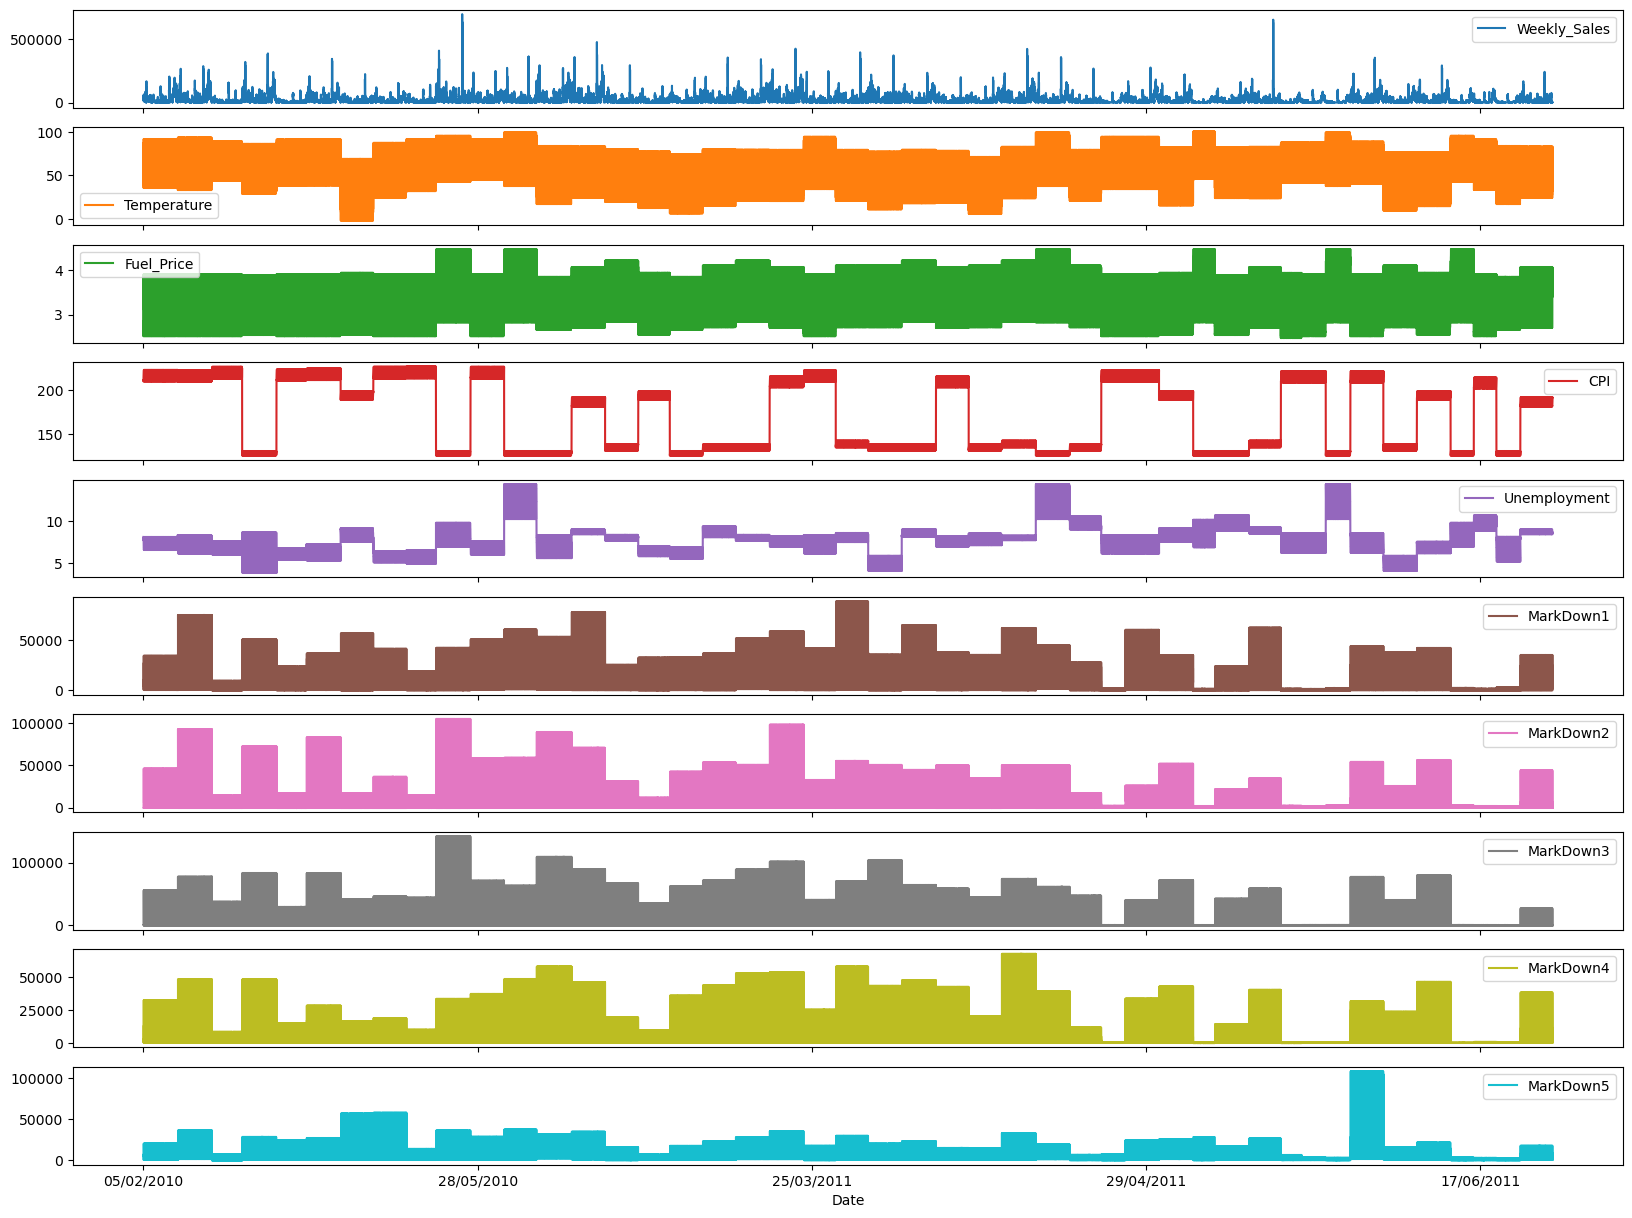

In [17]:
# Line Chart with Date as the independent varible and various columns as  dependent variables to track trends over time

merge_df[['Date',
          'Weekly_Sales',
          'Temperature',
          'Fuel_Price',
          'CPI',
          'Unemployment',
          'MarkDown1',
          'MarkDown2',
          'MarkDown3',
          'MarkDown4',
          'MarkDown5']].plot(x= 'Date', subplots=True, figsize=(20,15))

plt.show()

C:\Users\Ocey 2.0\AppData\Local\Temp\ipykernel_18956\538248177.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merge_df2['Date'] = pd.to_datetime(merge_df2['Date'])


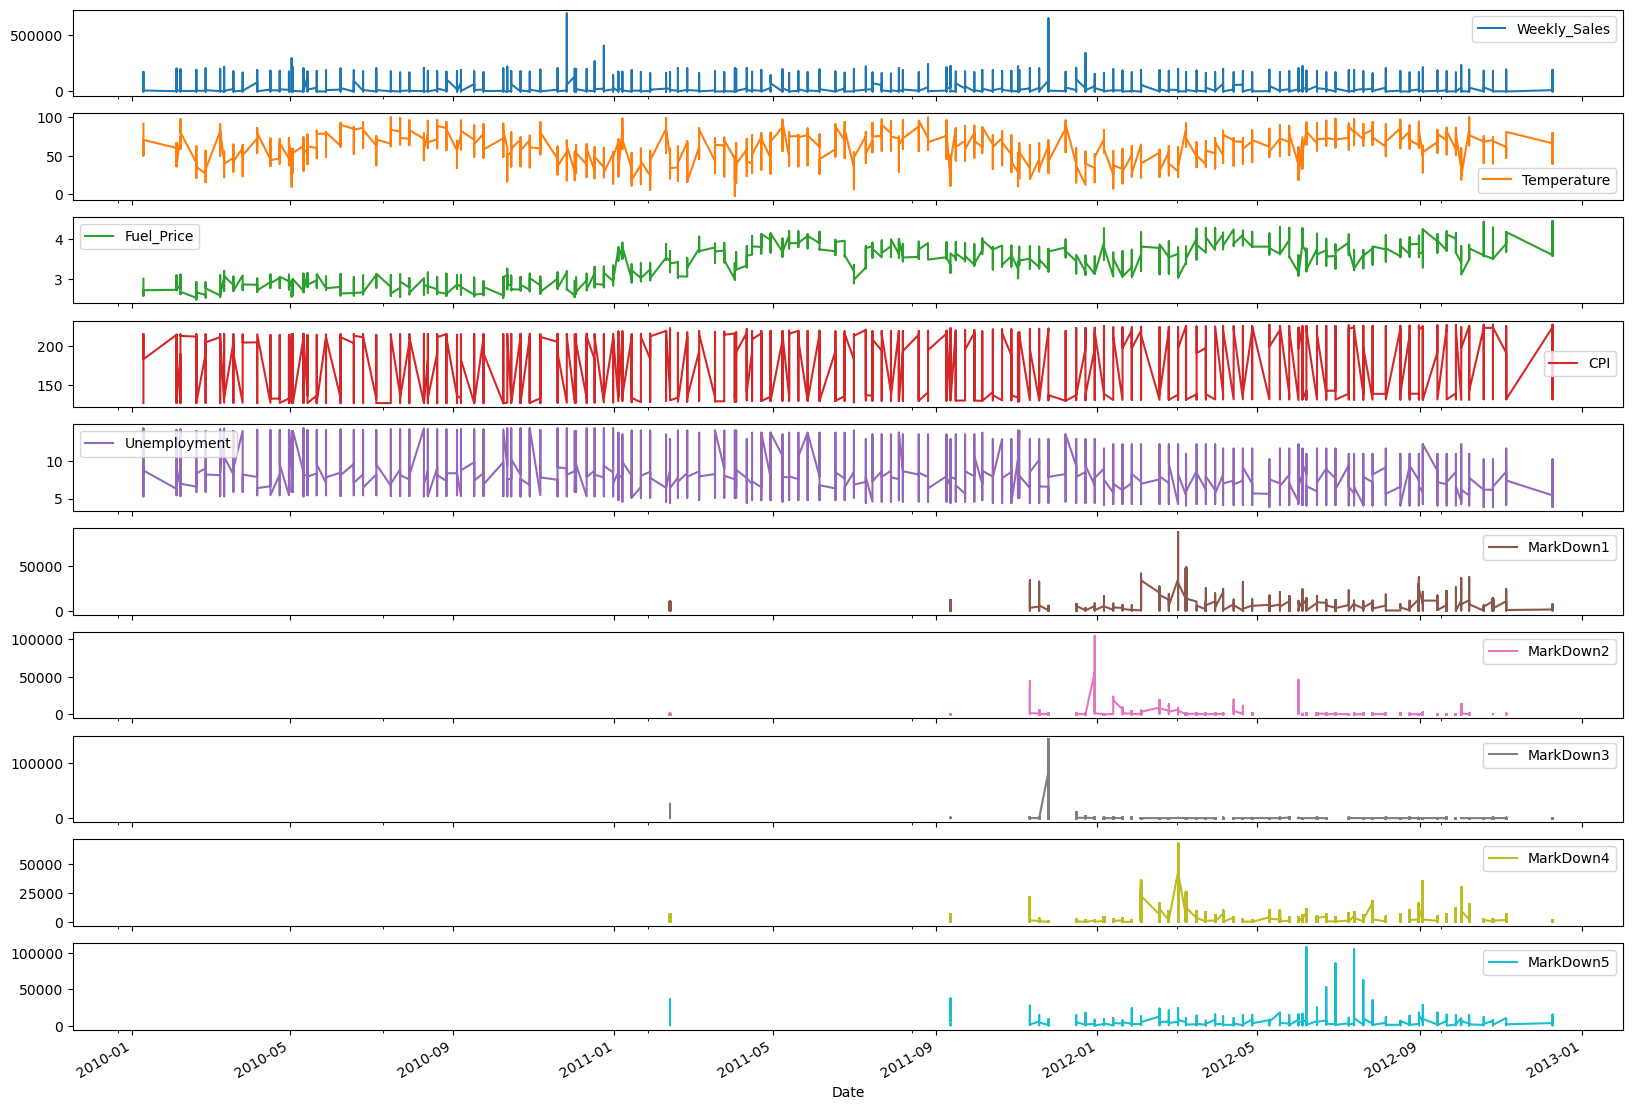

In [18]:
#Parse the dates to possible get a line graph and to see a more detailed visualization about the trends over time.

merge_df2 = merge_df.copy()
merge_df2['Date'] = pd.to_datetime(merge_df2['Date'])


merge_df2[['Date',
          'Weekly_Sales',
          'Temperature',
          'Fuel_Price',
          'CPI',
          'Unemployment',
          'MarkDown1',
          'MarkDown2',
          'MarkDown3',
          'MarkDown4',
          'MarkDown5']].plot(x= 'Date', subplots=True, figsize=(20,15))

plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?
    
    I noticed some significant missing data from the markdown prices which.
2. Do you have any concerns about your dataset?
   
   This data has already been cleaned so I would like to see what the raw data looked like
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
    
    Want to address the missing values for markdown (possibly replacing null values with zero)
    
    If there are any trends over time?
    
    Look more into the correlations between our columns
    